In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found / Name of the resources CSV: Measurement & Station.
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table - use BASE.CLASSES.COLUMN(Variable) taken from the csv resources.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# Similar to Stu_Dates exercise 10.3.3 - Remember define with "strftime" function the Year/Month/Day as "%Y-%m-%d"
# DATE came to the csv - column date.

max_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).all()
max_date

## Another option suggested by studygroup.
# engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23')]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.

# Func dt.timedelta from "https://docs.python.org/3/library/datetime.html" - a duration expressing the difference between two dates
# Func dt.date to separate a date by year, month, day.

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores / PRCP = came to the csv - column Precitpitation.
precipitation_results = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date > last_year)
    .order_by(Measurement.date)
    .all()
)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_results, columns = ["date", "precipitation"])

# Set the index (column X) with date variable / Facilitates the plot.
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by="date")
precipitation_df.head()


,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


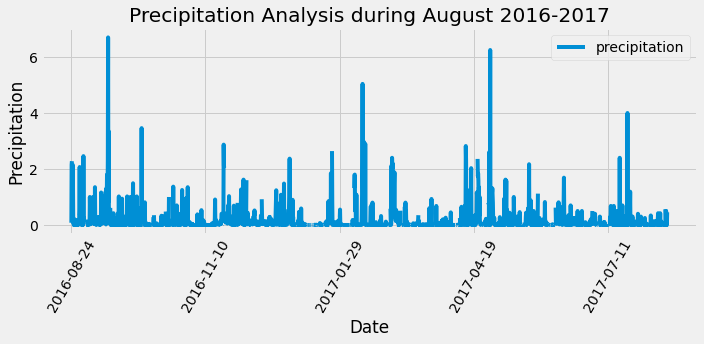

<Figure size 432x288 with 0 Axes>

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(figsize = (10, 5))
plt.title("Precipitation Analysis during August 2016-2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.xticks(rotation = 60)
plt.legend(loc="best")
plt.tight_layout()
plt.show()
plt.savefig("Resources/Precipitation.png")

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).count()
stations

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# Similar to Stu_Dates exercise 10.3.3 - doing step by step the filter/groupby/order

active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Second option taken from the study group.
# J column linked to the first column / i column linked to the second column.

for j, i in active_stations:
    print("The station " + j + " had " + str(i) + " observations.")

The station USC00519281 had 2772 observations.
The station USC00519397 had 2724 observations.
The station USC00513117 had 2709 observations.
The station USC00519523 had 2669 observations.
The station USC00516128 had 2612 observations.
The station USC00514830 had 2202 observations.
The station USC00511918 had 1979 observations.
The station USC00517948 had 1372 observations.
The station USC00518838 had 511 observations.


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = 'USC00519281'
temperature = session.query(
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

temperature


[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station.

most_active_station = 'USC00519281'

temperature_results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == most_active_station).all()

# Convert to dataframe
temperature_results_df = pd.DataFrame(temperature_results, columns = ["date", "temperature"])

# Set the index (column X) with date variable
temperature_results_df.set_index('date', inplace=True)

temperature_results_df

,temperature
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


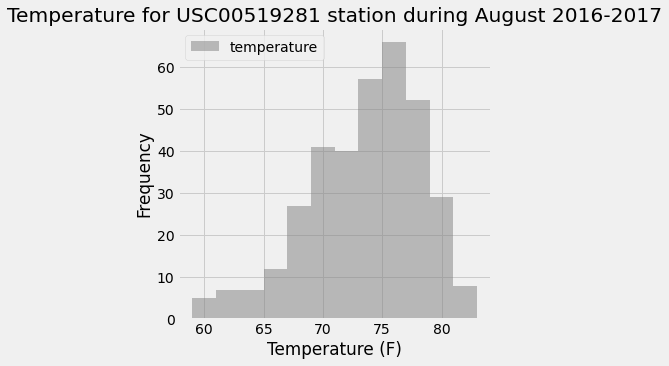

In [19]:
# Plot the results as a histogram

temperature_results_df.plot(kind="hist", color="grey", bins=12, alpha=0.5, figsize=(5, 5))
plt.title("Temperature for USC00519281 station during August 2016-2017")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.savefig("Resources/Temperature.png")                         

# Close session

In [20]:
# Close Session
session.close()